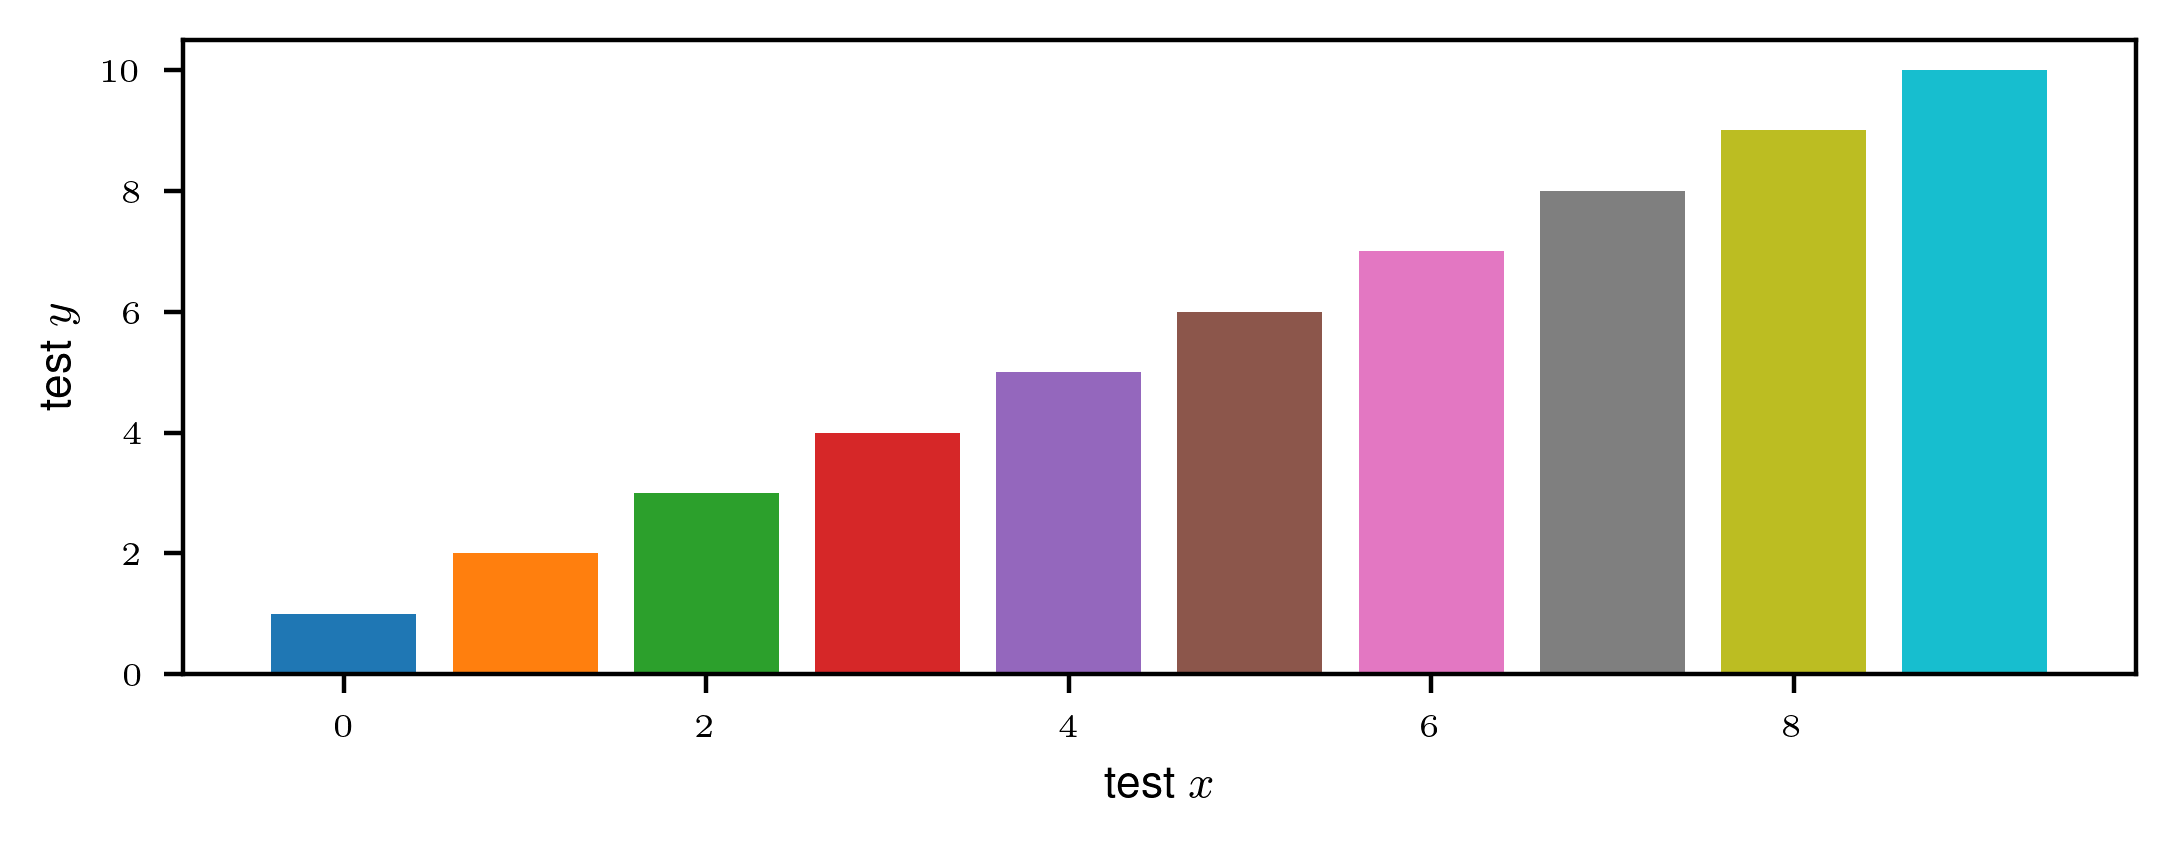

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines

text_width = 6.30107 # in  --> Confirmed with template explanation

fs_m1 = 6  # for figure ticks
fs = 8  # for regular figure text
fs_p1 = 9  # figure titles

matplotlib.rc('font', size=fs)          # controls default text sizes
matplotlib.rc('axes', titlesize=fs)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=fs)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=fs_m1)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=fs_m1)    # legend fontsize
matplotlib.rc('figure', titlesize=fs_p1)  # fontsize of the figure title


matplotlib.rc('font', **{'family':'sans-serif', 'sans-serif': ['Helvetica']})
matplotlib.rc('text', usetex=True)

plt.figure(dpi=400, figsize=(text_width, text_width/3))
for i in range(10):
       plt.bar(i, i + 1, color=f'C{i}', zorder=2)
       # ^ This zorder nonsense makes the grid  lines go behid the bars. I don't know why this is needed for barplots, but shouldn't usually be needed.
# plt.title('\\textbf{Test}, $\\mathcal{C}, \\mathbb{R}$')
plt.xlabel('test $x$')
plt.ylabel('test $y$')
plt.show()

plt.style.use(['paper.mplstyle'])

In [2]:
#compute prep amount fot the different networks
rdn_dir = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_rdn/seed_0_mixed"
skew_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_skew/seed_0_mixed"
disc_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_disc/seed_0_mixed"
soc_dir = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_0_mixed"
surrogate_dir = f"/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_sim_soc/seed_0_mixed"

def rates_rdn(i=0,t=300):
    return np.loadtxt(f"{rdn_dir}/rates_{i}_{t}")

def rates_skew(i=0,t=300):
    return np.loadtxt(f"{skew_dir}/rates_{i}_{t}")


def rates_soc(i=0,t=300):
    return np.loadtxt(f"{soc_dir}/rates_{i}_{t}")

def rates_surrogate(i=0, t=300):
    return np.loadtxt(f"{surrogate_dir}/rates_{i}_{t}")


def rates_disc(i=0,t=300):
    return np.loadtxt(f"{disc_dir}/rates_{i}_{t}")


def us_rdn(i=0,t=300):
    return np.loadtxt(f"{rdn_dir}/us_{i}_{t}")

def us_skew(i=0,t=300):
    return np.loadtxt(f"{skew_dir}/us_{i}_{t}")

def us_soc(i=0,t=300):
    return np.loadtxt(f"{soc_dir}/us_{i}_{t}")


def us_surrogate(i=0, t=300):
    return np.loadtxt(f"{surrogate_dir}/us_{i}_{t}")

def us_disc(i=0,t=300):
    return np.loadtxt(f"{disc_dir}/us_{i}_{t}")

def thetas_rdn(i=0,t=300):
    return np.loadtxt(f"{rdn_dir}/thetas_{i}_{t}")

def thetas_skew(i=0,t=300):
    return np.loadtxt(f"{skew_dir}/thetas_{i}_{t}")

def thetas_surrogate(i=0,t=300):
    return np.loadtxt(f"{surrogate_dir}/thetas_{i}_{t}")

def thetas_soc(i=0,t=300):
    return np.loadtxt(f"{soc_dir}/thetas_{i}_{t}")

def thetas_disc(i=0,t=300):
    return np.loadtxt(f"{disc_dir}/thetas_{i}_{t}")

targets = np.loadtxt(f"{soc_dir}/targets")
soc_eigs = np.loadtxt(f"{soc_dir}/eigs")
skew_eigs = np.loadtxt(f"{skew_dir}/eigs")
rdn_eigs = np.loadtxt(f"{rdn_dir}/eigs")
surrogate_eigs = np.loadtxt(f"{surrogate_dir}/eigs")



In [3]:
n_targets = 5
times = [0, 70, 200, 300, 500]
def prep_idx(dir):
    def get_prep_idx(us, t):
        if t == 0:
            return 0
        else : 
            cutoff = int(t/2 ) - 1
            u_prep, u_mov = us[:cutoff], us[cutoff:]
            return np.sum(u_prep**2)/np.sum(u_mov**2)
    def us(t,i):
        return np.loadtxt(f"{dir}/us_{i}_{t}")
    def get_all_idces(i):
        ai = np.asarray([get_prep_idx(us(t, i),t) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def cost_u(dir):
    def cost_u(t, i):
       return np.loadtxt(f'{dir}/u_cost_{i}_{t}')[-1]
    def get_all_idces(i):
        ai = np.asarray([cost_u(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(8)
    return m, v

def cost_tgt(dir):
    def cost_tgt(t, i):
       return np.loadtxt(f'{dir}/task_cost_{i}_{t}')[-1]
    def get_all_idces(i):
        ai = np.asarray([cost_tgt(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

def cost_torques(dir):
    def cost_torques(t, i):
       return np.loadtxt(f'{dir}/task_cost_{i}_{t}')[0]
    def get_all_idces(i):
        ai = np.asarray([cost_torques(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

def mv_loss(dir):
    def cost_torques(t, i):
       return np.loadtxt(f'{dir}/loss_{i}_{t}').sum()
    def get_all_idces(i):
        ai = np.asarray([cost_torques(t,i) for t in times])
        return ai
    movs = range(n_targets)
    idces = np.concatenate([get_all_idces(i)[:,None] for i in movs], axis=1)
    m, v = np.mean(idces, axis=1), np.std(idces, axis=1)/np.sqrt(n_targets)
    return m, v

In [4]:
m_prep_rdn, _ = prep_idx(rdn_dir)
m_prep_skew, _ = prep_idx(skew_dir)
m_prep_soc, _ = prep_idx(soc_dir)
m_prep_disc,_  = prep_idx(disc_dir)
m_prep_surrogate,_  = prep_idx(surrogate_dir)

m_loss_rdn, _ = mv_loss(rdn_dir)
m_loss_skew, _ = mv_loss(skew_dir)
m_loss_soc, _ = mv_loss(soc_dir)
m_loss_disc,_  = mv_loss(disc_dir)
m_loss_surrogate,_  = mv_loss(surrogate_dir)
print(m_prep_rdn, m_loss_rdn)

[0.         0.02709625 0.03357181 0.03403758 0.03420584] [1243.4756 1193.91   1186.9992 1185.8326 1183.5888]


In [27]:
scan_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams_continuous"
# skew_scan_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_skew_rads"
# rdn_scan_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams/monkeys_0.01_0.0000003_9.0/ramping_rdn_rads"
spectral_abscissas = [0.0, 0.1, 0.2, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
skew_radii = [0.1, 0.5, 0.8, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.7, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 11.0, 12.0, 13.0, 14.0, 15.]
soc_radii = [0.1, 0.8, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 0.3, 0.5, 0.7, 0.8, 1.0, 1.1, 1.3, 1.4, 1.6, 1.7, 1.8, 1.9, 2.1,0.2, 0.4, 0.6, 0.9, 1.3, 2.2, 2.7, 3.2, 3.7]
#1.0, 1.5, 2.0, 2.5, 3.0,  3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 10.0, 3.1, 3.4, 3.6, 3.8, 4.1, 4.2,4.3, 4.6, 4.9, 5.2, 5.3, 5.4, 5.7, 5.9]
rdn_radii = [0.0,0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
n_targets = 7
def get_pi_rads(dir, radii, typ):
    norms = []
    sas = []
    srs = []
    pis = []
    for rad in radii :
        for sa in spectral_abscissas :
            pi = 0
            k = 0
            for n in range(n_targets):
                try : 
                    if typ == "rdn":
                        res = np.loadtxt(f"{dir}/rdn_{n}_{rad}_{rad}")
                    elif typ == "skew": 
                        res = np.loadtxt(f"{dir}/skew_{n}_{rad}_{sa}")
                    elif typ == "soc": 
                        res = np.loadtxt(f"{dir}/soc_{n}_{rad}_{sa}")
                    pi += res[2]
                    k += 1
                except : 
                    assert True
            if k > 0 :
                norms.append(res[1])
                sas.append(res[-1])
                srs.append(res[-2])
                pis.append(pi/k)
    return np.asarray(norms), np.asarray(pis), np.asarray(sas), np.asarray(srs)

def get_pi_sas(dir, typ):
    norms = []
    sas = []
    srs = []
    pis = []
    rad = 1.5 if typ=="soc" else 4.0
    for sa in spectral_abscissas :
        pi = 0
        k = 0
        for n in range(n_targets):
            try : 
                if typ == "skew": 
                    res = np.loadtxt(f"{dir}/skew_{n}_{rad}_{sa}")
                elif typ == "soc": 
                    res = np.loadtxt(f"{dir}/soc_{n}_{rad}_{sa}")
                pi += res[2]
                k += 1
            except : 
                assert True
        if k > 0 :
            norms.append(res[1])
            sas.append(res[-1])
            srs.append(res[-2])
            pis.append(pi/k)
    return np.asarray(norms), np.asarray(pis), np.asarray(sas), np.asarray(srs)


In [28]:
soc_prep_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_soc/seed_5_prep"
soc_mov_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_soc/seed_5_mov"
soc_mixed_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_soc/seed_5_mixed"
skew_prep_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_skew/seed_5_prep"
skew_mov_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_skew/seed_5_mov"
skew_mixed_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_skew/seed_5_mixed"
rdn_prep_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_skew/seed_5_prep"
rdn_mov_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_rdn/seed_5_mov"
rdn_mixed_dir = "/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/comps/monkeys_0.05_0.00000003_5.0/ramping_rdn/seed_5_mixed"
n_targets = 6
def get_av_loss(dir, t):
    k = 0
    loss = 0
    for i in range(n_targets):
        try : 
            task_cost = np.sum(np.loadtxt(f"{dir}/task_cost_{i}_{t}"))
            input_cost = np.loadtxt(f"{dir}/u_cost_{i}_{t}")[-1]
            loss += task_cost + input_cost
            k+=1
        except : 
            assert True
    if k > 0:
        return loss/k
    else :
        return -10

def get_av_loss_prep(dir, t):
    k = 0
    loss = 0
    for i in range(n_targets):
        try : 
            task_cost = np.sum(np.loadtxt(f"{dir}/task_cost_{i}_{t}"))
            input_cost = np.loadtxt(f"{dir}/u_cost_{i}_{t}")[0]
            loss += task_cost + input_cost
            k+=1
        except : 
            assert True
    if k > 0:
        return loss/k
    else :
        return -10

def get_av_loss_mov(dir, t):
    k = 0
    loss = 0
    for i in range(n_targets):
        try : 
            task_cost = np.sum(np.loadtxt(f"{dir}/task_cost_{i}_{t}"))
            input_cost = np.loadtxt(f"{dir}/u_cost_{i}_{t}")[1]
            loss +=task_cost + input_cost
            k+=1
        except : 
            assert True
    if k > 0:
        return loss/k
    else :
        return -10

soc_loss, soc_prep_loss, soc_mov_loss = get_av_loss(soc_mixed_dir, 300), get_av_loss_prep(soc_prep_dir, 300), get_av_loss_mov(soc_mov_dir, 300)
skew_loss, skew_prep_loss, skew_mov_loss = get_av_loss(skew_mixed_dir, 300), get_av_loss_prep(skew_prep_dir, 300), get_av_loss_mov(skew_mov_dir, 300)
rdn_loss, rdn_prep_loss, rdn_mov_loss = get_av_loss(rdn_mixed_dir, 500), get_av_loss_prep(rdn_prep_dir, 500), get_av_loss_mov(rdn_mov_dir, 500)
print(rdn_loss, rdn_prep_loss, rdn_mov_loss)
print(skew_loss, skew_prep_loss, skew_mov_loss)
print(soc_loss, soc_prep_loss, soc_mov_loss)

-10 -10 -10
-10 -10 -10
-10 -10 -10


In [29]:
def get_all_pi_rads(dir, radii, typ):
    norms = []
    pis = []
    for rad in radii :
        for sa in spectral_abscissas :
            for n in range(n_targets):
                try : 
                    res = np.loadtxt(f"{dir}/{typ}_{n}_{rad}_{sa}")
                    pis.append(res[2])
                    norms.append(res[1])
                except : 
                    assert True
                for s in range(2):
                    try : 
                        res = np.loadtxt(f"{dir}/{typ}_{n}_{rad}_{sa}_{s}")
                        pis.append(res[2])
                        norms.append(res[1])
                    except : 
                        assert True
    return np.asarray(norms), np.asarray(pis)



(363,)


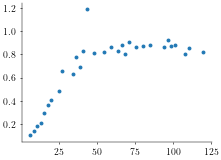

In [30]:
soc_norms, soc_pis = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams_continuous", soc_radii, "soc")
n_min, n_max = np.min(soc_norms), np.max(soc_norms)
n_bins = 50
soc_locs = []
prep_idces = []
print(soc_norms.shape)
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    soc_locs.append((loc_min + loc_max)/2)
    idces= np.argwhere((loc_min < soc_norms) & (soc_norms < loc_max))
    ppis = soc_pis[idces]
    prep_idces.append(np.mean(ppis))

#plt.scatter(locs, prep_idces)

skew_norms, skew_pis = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams_continuous", skew_radii, "skew")
n_min, n_max = np.min(skew_norms), np.max(skew_norms)
n_bins = 50
skew_locs = []
prep_idces_skew = []
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    skew_locs.append((loc_min + loc_max)/2)
    idces= np.argwhere((loc_min < skew_norms) & (skew_norms < loc_max))
    ppis = skew_pis[idces]
    prep_idces_skew.append(np.mean(ppis))

plt.scatter(skew_locs, prep_idces_skew)


[  4.94279   8.66807   7.99812  10.7052    9.95551  12.1848   14.8678
  16.6049   19.9797   21.0168   24.9811   26.0053   34.9394   35.5045
  47.123    47.4022   39.9334   40.0502   39.8466   40.4482   40.4335
  40.5901   40.8811   41.6471   42.1334   41.8628   54.3712   54.9737
  60.2076   59.7556   64.7428   65.2311   69.533    70.1637   74.9906
  74.9257   80.2512   79.4412   84.711    84.883    95.1347   93.9146
  99.5413   99.9381  109.83    110.019   119.912   119.613  ] [0.09803815 0.109235   0.14217467 0.155803   0.18458183 0.202702
 0.29501383 0.357087   0.3941005  0.483694   0.4846965  0.652334
 0.6347718  0.81281575 0.7050776  0.9163802  0.6653872  0.6876406
 0.7222962  0.7997372  0.8781836  0.91478    0.981167   1.05368
 1.16091    1.193965   0.7234994  0.948139   0.7629782  0.95204417
 0.759071   0.9372104  0.7697318  0.95278475 0.7625348  0.95138167
 0.7872236  0.9519738  0.7917632  0.95981417 0.7958204  0.9531068
 0.789353   0.96483425 0.8020682  0.95245    0.8085066  0.

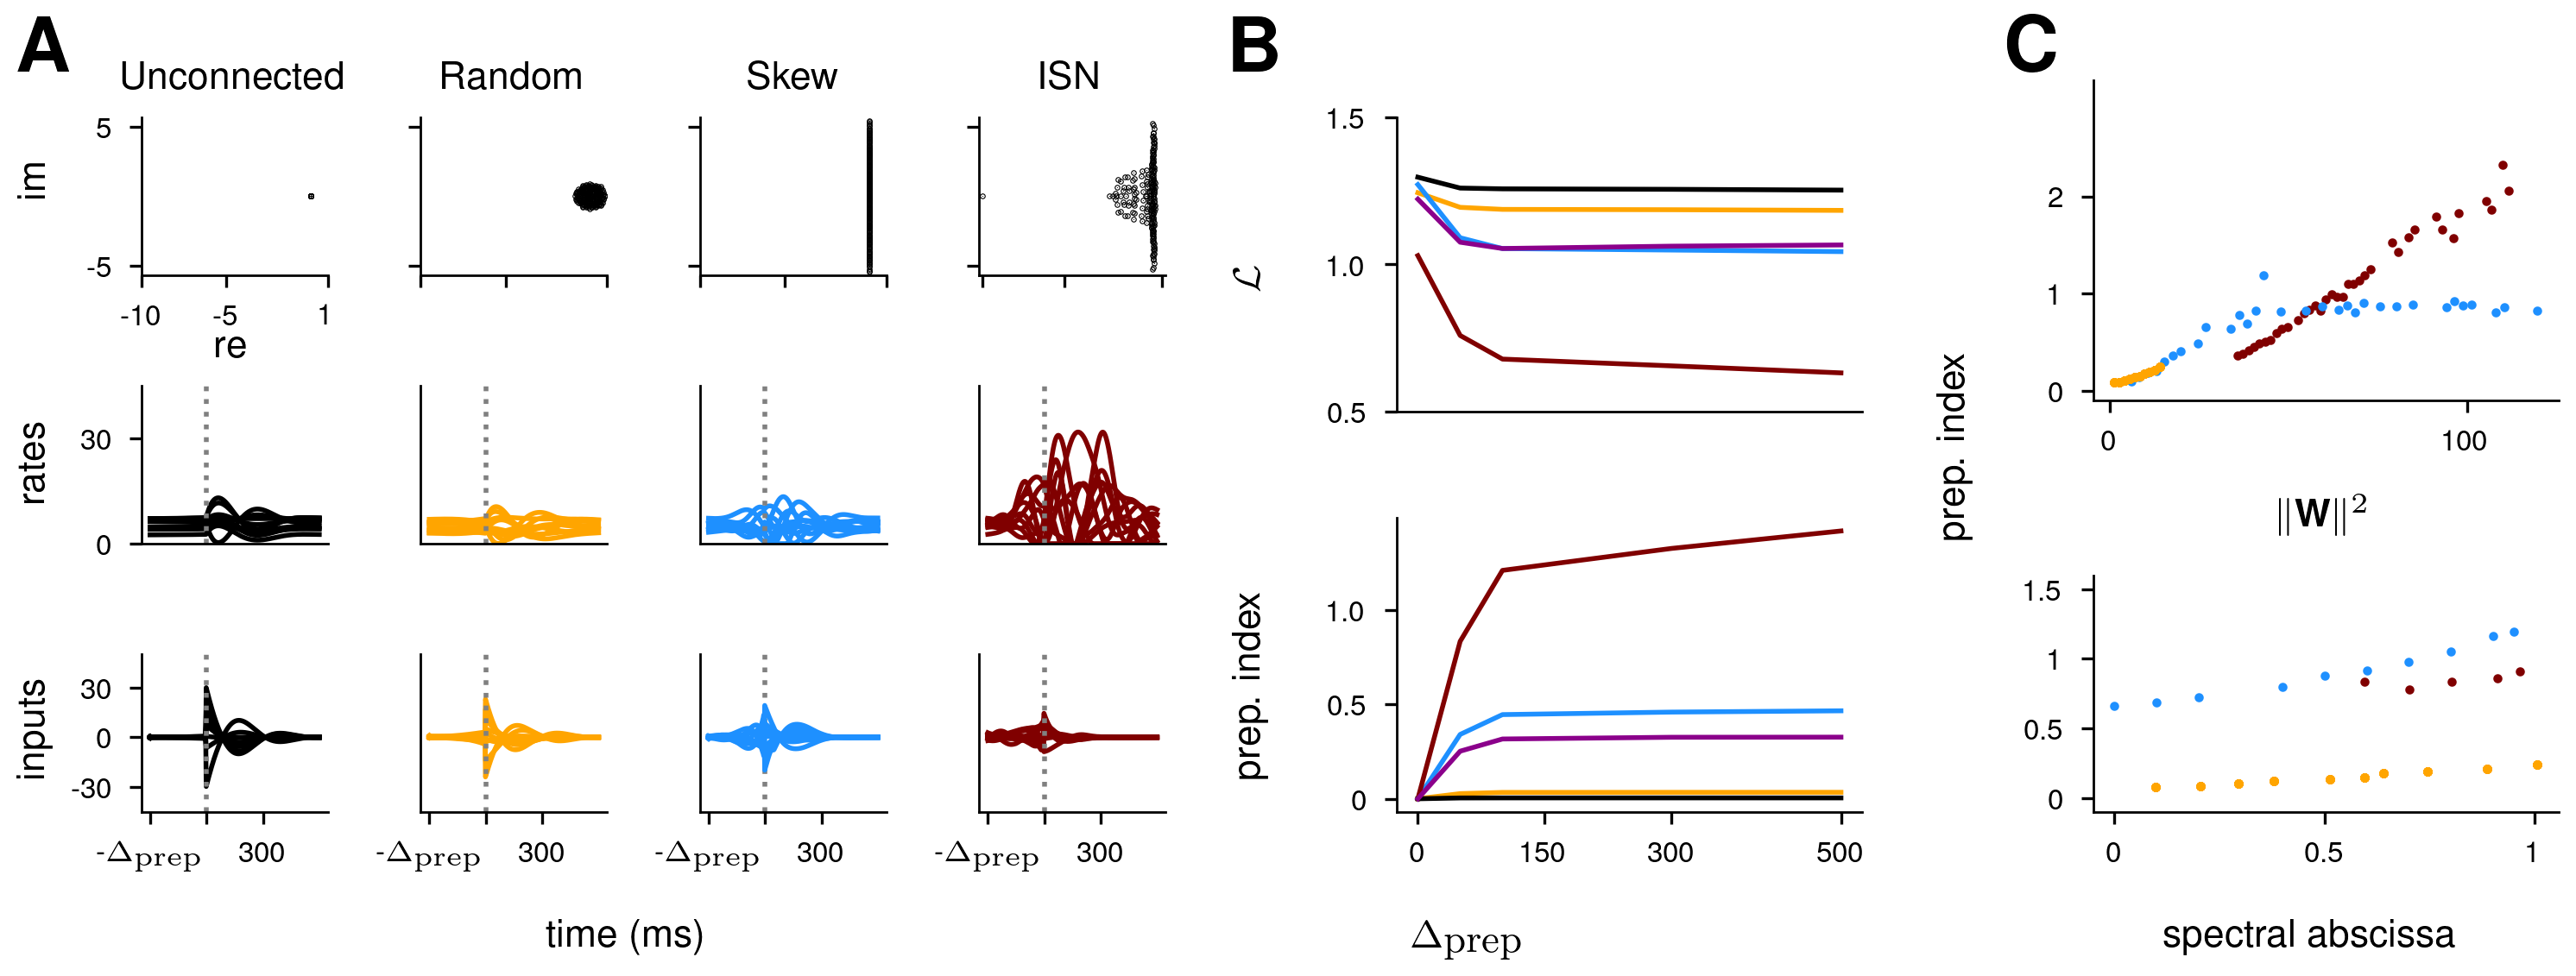

In [46]:
import matplotlib
import matplotlib.gridspec as gridspec
times = [0, 50, 100, 300, 500]
c_nets = {"rdn":"orange", "skew":"dodgerblue", "soc":"maroon", "lr":"forestgreen", "disc":"black", "surrogate":"darkmagenta"}
v1 = 1
v2 = 3
#for now just for visualization
gs = gridspec.GridSpec(3, 8)
fig, axes = plt.subplots(nrows=3, ncols=8,  figsize=((8, 8/3)), dpi = 400)
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.5)

cs = ["darkcyan", "darkorange", 'rosybrown', 'indigo', 'deepskyblue', 'royalblue', 'slategray']
neurons = [0, 8, 11, 20, 44, 100, 101, 144, 198, 199]

ax_loss = plt.subplot(gs[:2,4:6])
ax_prep = plt.subplot(gs[2:,4:6])


##Plot the evolutions as function of spectral radius and norm, and for different prep amounts
ax_norm = plt.subplot(gs[:2,-2:])
ax_sa = plt.subplot(gs[2,-2:])
ax_sa.set_ylim(-0.1,1.6)
ax_sa.set_yticks([0,0.5,1,1.5], [0,0.5,1,1.5], fontsize = fs_m1)
ax_sa.set_xticks([0,1], [0,1], fontsize = fs_m1)
ax_norm.set_ylim(-0.1,3.2)
ax_norm.set_yticks([0,1,2], [0,1,2], fontsize = fs_m1)
ax_norm.set_xticks([0,100,200], [0,100,200], fontsize = fs_m1)
#ax_prior = plt.subplot(gs[0,:2])
#ax_prior.set_ylim(-1,20)
#ax_prior.set_yticks([1], [1])
pos_norm, pos_sa = ax_norm.get_position(), ax_sa.get_position()
#pos_prior = ax_prior.get_position()
ax_norm.set_position([pos_norm.x0 + 0.1, pos_norm.y0 + 0.04 + pos_norm.height/4, pos_norm.width, 0.75*pos_norm.height])
ax_sa.set_position([pos_norm.x0 + 0.1, pos_sa.y0, pos_sa.width, 1.5*pos_sa.height])
#ax_prior.set_position([pos_norm.x0 - 0.05, pos_prior.y0, pos_prior.width, 0.9*pos_prior.height - 0.03])
ax_norm.set_xlabel("$\\|\\textbf{W}\\|^2$", size = fs)
# ax_sa.set_xlabel("spectral abscissa")
#ax_prior.set_xticks([], [])
##Norm plot
soc_norms, soc_pis, soc_sas, soc_srs = get_pi_rads(scan_dir, soc_radii, "soc")
skew_norms, skew_pis, skew_sas, skew_srs = get_pi_rads(scan_dir, skew_radii, "skew")
_, skew_pis_sas, skew_sas, _ = get_pi_sas(scan_dir, "skew")
_, soc_pis_sas, soc_sas, _ = get_pi_sas(scan_dir, "soc")
print(skew_norms,skew_pis)
rdn_norms, rdn_pis, rdn_sas, rdn_srs = get_pi_rads(scan_dir, rdn_radii, "rdn")
print(soc_sas)

ax_norm.scatter(soc_locs, prep_idces, color = c_nets["soc"], s=0.8)
#ax_norm.scatter(soc_norms, soc_pis, color = c_nets["soc"], s=0.8)
ax_norm.scatter(skew_locs, prep_idces_skew, color = c_nets["skew"], s=0.8)
#ax_norm.scatter(skew_norms, skew_pis, color = c_nets["skew"],  s=0.8)
ax_norm.scatter(rdn_norms, rdn_pis, color = c_nets["rdn"], s = 0.8)
###SA plot
ax_sa.scatter(soc_sas, soc_pis_sas, color = c_nets["soc"],  s=0.8)
ax_sa.scatter(skew_sas, skew_pis_sas, color = c_nets["skew"],  s=0.8)
ax_sa.scatter(rdn_sas, rdn_pis, color = c_nets["rdn"],  s=0.8)
ax_sa.set_xticks([0,0.5,1], [0,0.5, 1], fontsize = fs_m1)
##prior comp
'''
ax_prior.set_xlim(0,6)
ax_prior.scatter(1, 1, color = c_nets["soc"], marker='o')
ax_prior.scatter(1, soc_prep_loss/soc_loss, color = c_nets["soc"], marker='D')
ax_prior.scatter(1, soc_mov_loss/soc_loss, color = c_nets["soc"], marker='x')
ax_prior.plot(3, 1, color = c_nets["skew"], marker='o')
ax_prior.plot(3, skew_prep_loss/skew_loss, color = c_nets["skew"], marker='D')
ax_prior.plot(3, skew_mov_loss/skew_loss, color = c_nets["skew"], marker='x')
ax_prior.plot(5, 1, color = c_nets["rdn"], marker='o')
ax_prior.plot(5, rdn_prep_loss/rdn_loss, color = c_nets["rdn"], marker='D')
ax_prior.plot(5, rdn_mov_loss/rdn_loss, color = c_nets["rdn"], marker='x')
ax_prior.set_xticks([1, 3, 5], ["ISN", "Skew", "Rdn"])
circle = mlines.Line2D([], [], color='black', marker='o', linestyle='None',
                          markersize=3, label='mixed')
diamond = mlines.Line2D([], [], color='black', marker='D', linestyle='None',
                          markersize=3, label='prep')
cross = mlines.Line2D([], [], color='black', marker='x', linestyle='None',
                          markersize=3, label='mov')

plt.legend(handles=[circle, diamond, cross], loc = (0.7, 1.4))'''
## Disc
ax00 = plt.subplot(gs[0,0])
ax01 = plt.subplot(gs[1,0])
ax02 = plt.subplot(gs[2,0])
ax00.set_yticks([0,3], [0,3], fontsize= fs_m1)
# ax00.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax00.set_xticks([])
ax00.set_title("Unconnected",  fontsize= fs)
# ax00.plot(np.sqrt(thetas_disc()[:,2]**2+thetas_disc()[:,3]**2),  c_nets["disc"])
ax00.set_xticks([])
ax00.set_yticks([0,2], [0,2])
# ax00.set_ylabel('vel', fontsize = fs)
ax01.plot(rates_disc()[:,:10], c_nets["disc"])
ax01.set_yticks([0,30], [0,30], fontsize= fs_m1)
ax01.set_ylim(0,45)
ax01.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax01.set_xticks([])
# ax01.set_ylabel('rates', fontsize = fs)
ax02.plot(us_disc()[:,:10], c_nets["disc"])
ax02.vlines(150,-45, 50, color="gray", linestyle="dotted")
ax02.set_ylim(-45,50)
# ax02.set_ylabel('inputs', fontsize = fs)
ax02.set_yticks([-30,0,30], [-30,0,30], fontsize= fs_m1)
ax02.set_xticks([0,150, 300], ['-$\\Delta_{\\textrm{prep}}$','', '300'], fontsize= fs_m1)
ax00.plot(0*skew_eigs[:,0],0*skew_eigs[:,1], 'ok', markersize=0.2)
ax00.set_yticks([-5,5], [-5,5], fontsize= fs_m1)
ax00.set_xticks([-10,-5,1], [-10,-5,1], fontsize= fs_m1)
ax00.set_ylim(-5.7, 5.7)
#ax01.set_ylabel('im', fontsize=fs_m1, labelpad = -1)
# ax00.set_xlabel('re', fontsize=fs_m1, labelpad = -3)

## Skew
ax01 = plt.subplot(gs[0,2])
ax11 = plt.subplot(gs[1,2])
ax21 = plt.subplot(gs[2,2])
ax01.set_yticks([])
ax01.set_xticks([])
ax01.set_title("Skew", fontsize= fs)
# ax01.plot(np.sqrt(thetas_skew()[:,2]**2+thetas_skew()[:,3]**2), color = c_nets["skew"])
# ax01.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax01.set_xticks([])
ax11.plot(rates_skew()[:,:10], color = c_nets["skew"])
ax21.set_ylim(-45,50)
ax21.vlines(150, -45, 50, color="gray", linestyle="dotted")
ax21.set_yticks([])
ax11.set_ylim(0,45)
ax11.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax11.set_xticks([])
ax11.set_yticks([])
ax21.set_xticks([0,150, 300], ['-$\\Delta_{\\textrm{prep}}$', '', '300'], fontsize= fs_m1)
ax21.plot(us_skew()[:,:10], color = c_nets["skew"])
pos1 = ax01.get_position()
left, bottom, width, height = pos1.x0 + 0.065, pos1.y0 + 0.08, 0.028, 0.046
#ax1 = fig.add_axes([left, bottom, width, height])
ax01.plot(skew_eigs[:,0],skew_eigs[:,1], 'ok', markersize=0.2)
ax01.set_yticks([-5,5], [], fontsize= fs_m1)
ax01.set_xticks([-10,-5,1], [], fontsize= fs_m1)
ax01.set_ylim(-5.7, 5.7)
#ax01.set_ylabel('im', fontsize=fs_m1, labelpad = -1)
#ax1.set_xlabel('re', fontsize=fs_m1, labelpad = -3)
#ax1.set_xlim(-5.7, 5.7)
#ax1.set_aspect('equal', 'box')

ax02 = plt.subplot(gs[0,1])
ax12 = plt.subplot(gs[1,1])
ax22 = plt.subplot(gs[2,1])
ax02.set_yticks([])
ax02.set_xticks([])
ax02.set_title("Random", fontsize= fs)
# ax02.plot(np.sqrt(thetas_rdn()[:,2]**2+thetas_rdn()[:,3]**2), c_nets["rdn"])
# ax02.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax02.set_xticks([])
ax12.plot(rates_rdn()[:,:10], color = c_nets["rdn"])
ax12.set_ylim(0,45)
ax12.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax12.set_xticks([])
ax12.set_yticks([])
ax22.plot(us_rdn()[:,:10], color = c_nets["rdn"])
ax22.set_yticks([])
ax22.set_xticks([0,150, 300], ['-$\\Delta_{\\textrm{prep}}$', '', '300'], fontsize= fs_m1)
ax22.set_ylim(-45,50)
ax22.vlines(150, -45, 50, color="gray", linestyle="dotted")
left, bottom, width, height = [0.487, 0.8, 0.03, 0.05]
pos2 = ax02.get_position()
#left, bottom, width, height = pos2.x0 + 0.06, pos2.y0 + 0.08, 0.03, 0.05
#ax02 = fig.add_axes([left, bottom, width, height])
ax02.plot(rdn_eigs[:,0],rdn_eigs[:,1], 'ok', markersize=0.2)
ax02.set_yticks([-5,5], [], fontsize= fs_m1)
ax02.set_xticks([-10,-5,1], [], fontsize= fs_m1)
ax02.set_ylim(-5.7, 5.7)
#ax02.set_xlim(-5.7, 5.7)
#ax02.set_aspect('equal', 'box')
# ax2.set_ylabel('im', fontsize=fs_m1, labelpad = 3)
# ax2.set_xlabel('re', fontsize=fs_m1, labelpad = 3)



ax03 = plt.subplot(gs[0,3])
ax13 = plt.subplot(gs[1,3])
ax23 = plt.subplot(gs[2,3])
ax03.set_yticks([])
ax03.set_xticks([])
ax03.set_title("ISN", fontsize=fs)
# ax03.plot(np.sqrt(thetas_soc()[:,2]**2+thetas_soc()[:,3]**2), color = c_nets["soc"])
# ax03.vlines(150, 0, 4, color="gray", linestyle="dotted")
ax03.set_xticks([])
ax13.plot(rates_soc()[:,:10], color = c_nets["soc"])
ax13.set_xticks([])
ax23.plot(us_soc()[:,:10], color = c_nets["soc"])
ax23.set_ylim(-45,50)
ax23.vlines(150, -45, 50, color="gray", linestyle="dotted")
ax23.set_yticks([])
ax13.set_ylim(0,45)
ax13.vlines(150, 0, 65, color="gray", linestyle="dotted")
ax13.set_yticks([])
ax23.set_xticks([0,150, 300], ['-$\\Delta_{\\textrm{prep}}$', '', '300'], fontsize=fs_m1)
pos3 = ax03.get_position()
# left, bottom, width, height = pos3.x0 + 0.06, pos3.y0 + 0.08, 0.03, 0.05
# ax3 = fig.add_axes([left, bottom, width, height])
ax03.plot(soc_eigs[:,0],soc_eigs[:,1], 'ok', markersize=0.2)
ax03.set_yticks([-5,5], [], fontsize=fs)
ax03.set_xticks([-10,-5,1], [], fontsize=fs)
ax03.set_xlim(-10.2,1.2)
ax03.set_ylim(-5.7, 5.7)
# ax3.set_aspect('equal', 'box')
# ax3.set_ylabel('im', fontsize=fs_m1, labelpad = 3)
# ax3.set_xlabel('re', fontsize=fs_m1, labelpad = 3)

#Plot total loss as funcion of Dprep
p = ax_loss.get_position()
new_height = 0.32
ax_loss.set_position([p.x0 + 0.05, p.y0 + p.height - new_height, p.width, new_height])
ax_loss.plot(times, m_loss_rdn, c_nets['rdn'], label="Random")
ax_loss.plot(times, m_loss_skew,  c_nets['skew'], label="Skew")
ax_loss.plot(times, m_loss_soc,  c_nets['soc'], label="SOC")
#ax_loss.plot(times, m_loss_lr,  "gray", label="LR")
# ax_loss.plot(times, m_loss_lr,  c_nets['lr'], label="Low-rank")
ax_loss.plot(times, m_loss_disc, color="k", label="Unconnected")
ax_loss.plot(times, m_loss_surrogate, color=c_nets['surrogate'], label="Surrogate SOC")
ax_loss.set_xticks([])
ax_loss.set_yticks([500,1000,1500], [0.5,1.0,1.5], fontsize = fs_m1)
# ax_loss.set_ylabel("loss", fontsize = fs, labelpad = -1)
# ax_loss.legend()

##Plot preparation amount
p = ax_prep.get_position()
ax_prep.set_position([p.x0 + 0.05, p.y0, p.width, new_height])
ax_prep.plot(times, m_prep_rdn, color = c_nets["rdn"], label="Random")
ax_prep.plot(times, m_prep_skew,  color = c_nets["skew"], label="Skew")
ax_prep.plot(times, m_prep_soc,  color = c_nets["soc"], label="SOC")
#ax_prep.plot(times, m_prep_lr,  "gray", label="LR")
ax_prep.plot(times, m_prep_disc, color = c_nets["disc"], label ="Unconnected")
ax_prep.plot(times, m_prep_surrogate, color = c_nets["surrogate"], label ="Surrogate SOC")
ax_prep.set_xticks([0, 150, 300, 500], [0, 150, 300, 500], fontsize = fs_m1)
ax_prep.set_yticks([0,0.5,1.0], [0,0.5,1.0], fontsize = fs_m1)
# ax_prep.set_ylabel("prep. index", fontsize = fs, labelpad = -1)
# ax_prep.set_xlabel("$\\Delta_{\\textrm{prep}}$", fontsize = 12)


fig.text(0.08, 0.93, '$\\textbf{A}$', size = 16)
fig.text(0.52, 0.93, '$\\textbf{B}$', size = 16)
fig.text(0.8, 0.93, '$\\textbf{C}$', size = 16)
fig.text(0.30, -0.021, 'time (ms)', size = fs, ha='center')
fig.text(0.158, 0.62, 're', size = fs, ha='center')
fig.text(0.91, -0.021, 'spectral abscissa', size = fs, ha='center')
fig.text(0.605, -0.021, "$\\Delta_{\\textrm{prep}}$", size = fs, ha='center')
fig.text(0.52, 0.17, 'prep. index', size = fs, rotation = "vertical")
fig.text(0.775, 0.43, 'prep. index', size = fs, rotation = "vertical")
#fig.text(0.027, 0.71, "$\\mathcal{L}/\\mathcal{L}(0)$", size = fs, rotation = "vertical")
fig.text(0.52, 0.7, '$\\mathcal{L}$', size = fs, rotation = "vertical")
fig.text(0.08, 0.47, 'rates', size = fs, rotation = "vertical")
fig.text(0.08, 0.17, 'inputs', size = fs, rotation = "vertical")
fig.text(0.08, 0.8, 'im', size = fs, rotation = "vertical")
fig.savefig("fig_comp_nets.pdf", format = "pdf", bbox_inches='tight')

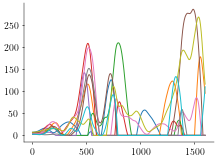

0.8962313665971814


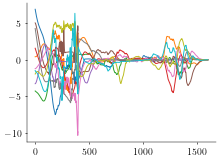

In [32]:
rates = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_13_mixed_dt/rates_7_200")
plt.plot(rates[:,:10])
plt.show()
plt.figure()
inputs = np.loadtxt("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/final_results/ramping_soc/seed_13_mixed_dt/us_7_200")
plt.plot(inputs[:,:10])
print(np.linalg.norm(inputs[:249,:10])/np.linalg.norm(inputs[249:,:10]))

(363,)


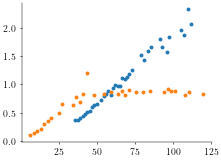

In [33]:
soc_norms, soc_pis = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams_continuous", soc_radii, "soc")
n_min, n_max = np.min(soc_norms), np.max(soc_norms)
n_bins = 50
soc_locs = []
prep_idces = []
print(soc_norms.shape)
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    soc_locs.append((loc_min + loc_max)/2)
    idces= np.argwhere((loc_min < soc_norms) & (soc_norms < loc_max))
    ppis = soc_pis[idces]
    prep_idces.append(np.mean(ppis))

plt.scatter(soc_locs, prep_idces)

skew_norms, skew_pis = get_all_pi_rads("/home/mmcs3/rds/rds-t2-cs156-T7o4pEA8QoU/mmcs3/hyperparams_continuous", skew_radii, "skew")
n_min, n_max = np.min(skew_norms), np.max(skew_norms)
n_bins = 50
skew_locs = []
prep_idces_skew = []
for i in range(n_bins):
    loc_min = n_min + i/n_bins*(n_max - n_min)
    loc_max = n_min + (i+1)/n_bins*(n_max - n_min)
    skew_locs.append((loc_min + loc_max)/2)
    idces= np.argwhere((loc_min < skew_norms) & (skew_norms < loc_max))
    ppis = skew_pis[idces]
    prep_idces_skew.append(np.mean(ppis))

plt.scatter(skew_locs, prep_idces_skew)
